In [1]:
import data_structure as ds
from data_structure import Gender
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

men_curr = ds.locate('Peter',
          column='current_salary',
          gender=Gender.Male,
          dataframe=ds.search_all())

female_curr = ds.locate('Peter',
            column='current_salary',
            gender=Gender.Female,
            dataframe=ds.search_all())

np.mean(men_curr), np.mean(female_curr)

INFO:root:Dataframe provided, ignoring user Peter
INFO:root:Locating current_salary for males in all's database
INFO:root:Dataframe provided, ignoring user Peter
INFO:root:Locating current_salary for females in all's database


(np.float64(72.7200996677741), np.float64(71.42617147707979))

In [2]:
men_deserved = ds.locate('Peter',
          column='deserved_salary',
          gender=Gender.Male,
          dataframe=ds.search_all())

female_deserved = ds.locate('Peter',
            column='deserved_salary',
            gender=Gender.Female,
            dataframe=ds.search_all())

np.mean(men_deserved), np.mean(female_deserved)
                         

INFO:root:Dataframe provided, ignoring user Peter
INFO:root:Locating deserved_salary for males in all's database
INFO:root:Dataframe provided, ignoring user Peter
INFO:root:Locating deserved_salary for females in all's database


(np.float64(89.26079734219269), np.float64(87.58913412563668))

In [3]:
df = ds.search_all()
df.groupby('name')[['deserved_salary', 'current_salary']].mean().sort_values('deserved_salary', ascending=False)

,deserved_salary,current_salary
name,,
Michael,90.500000,73.833333
John,89.833333,73.333333
William,89.830508,73.644068
Joseph,89.750000,73.000000
Robert,89.583333,73.250000
Christopher,89.538462,73.192308
Richard,88.983051,71.949153
Jessica,88.793103,72.413793
Karen,88.448276,72.155172


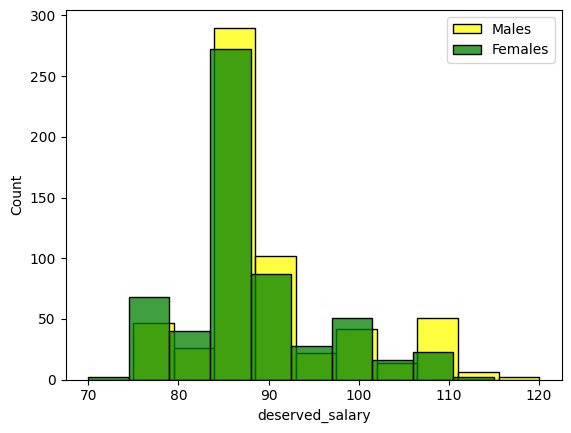

In [4]:
import seaborn as sns

# sns.histplot(data=df.groupby('gender')['deserved_salary'])

m_mask = df['gender'] == Gender.Male
f_mask = df['gender'] == Gender.Female

df_men, df_fem = df[m_mask], df[f_mask]

sns.histplot(data=df[m_mask]['deserved_salary'], color='yellow', bins=10, label='Males')
sns.histplot(data=df[f_mask]['deserved_salary'], color='green', bins=10, label='Females')
plt.legend()

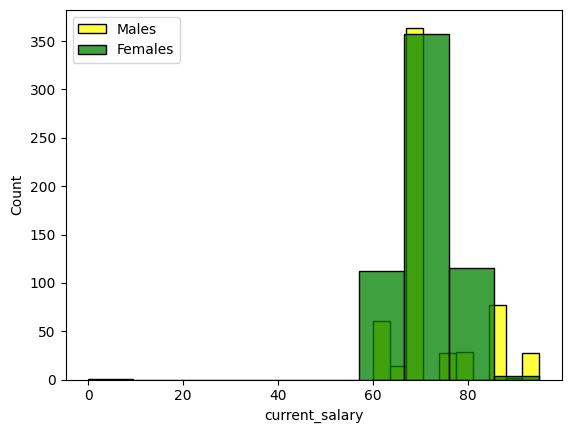

In [5]:
sns.histplot(data=df[m_mask]['current_salary'], color='yellow', bins=10, label='Males')
sns.histplot(data=df[f_mask]['current_salary'], color='green', bins=10, label='Females')
plt.legend()

In [6]:
from scipy.stats import ttest_ind, norm

ttest_ind(df[m_mask]['deserved_salary'], df[f_mask]['deserved_salary'])
ttest_ind(df[m_mask]['current_salary'], df[f_mask]['current_salary'])

TtestResult(statistic=np.float64(2.727311086228286), pvalue=np.float64(0.006479241375956746), df=np.float64(1189.0))

In [7]:
spooled = np.sqrt(
    (
        ((len(df_men)-1)*df_men['deserved_salary'].std()**2) + 
    ((len(df_fem)-1)*df_fem['deserved_salary'].std()**2)
    ) / (len(df_men) + len(df_fem) - 2)
    )



cohen_d = (df[m_mask]['deserved_salary'].mean() - df[f_mask]['deserved_salary'].mean()) / spooled
cohen_d

np.float64(0.18481805481685365)

In [8]:
import statsmodels.stats.power as smp

effect_size = cohen_d
alpha = 0.01
power = 0.99

nobs1 = smp.tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative='two-sided')
nobs1


1408.7416657175784

<Axes: xlabel='deserved_salary', ylabel='Count'>

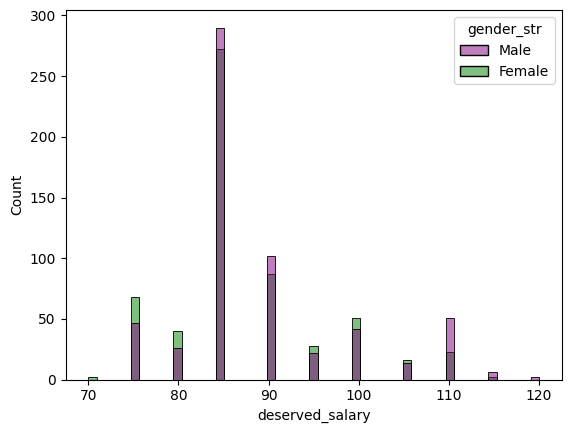

In [9]:
df['gender_str'] = df['gender'].apply(lambda x: x.name)

# Now use 'gender_str' for the 'hue' parameter
sns.histplot(df, x='deserved_salary', hue='gender_str', palette=['purple', 'green'])

In [10]:
chris_des = ds.locate(user='Peter', name='Christopher', column='deserved_salary', dataframe=ds.search_all())
chris_curr = ds.locate(user='Peter', name='Christopher', column='current_salary', dataframe=ds.search_all())

sus_des = ds.locate(user='Peter', name='Susan', column='deserved_salary', dataframe=ds.search_all())
sus_curr = ds.locate(user='Peter', name='Susan', column='current_salary', dataframe=ds.search_all())

INFO:root:Dataframe provided, ignoring user Peter
INFO:root:Locating deserved_salary for Christopher in all's database
INFO:root:Dataframe provided, ignoring user Peter
INFO:root:Locating current_salary for Christopher in all's database
INFO:root:Dataframe provided, ignoring user Peter
INFO:root:Locating deserved_salary for Susan in all's database
INFO:root:Dataframe provided, ignoring user Peter
INFO:root:Locating current_salary for Susan in all's database


<Axes: ylabel='Count'>

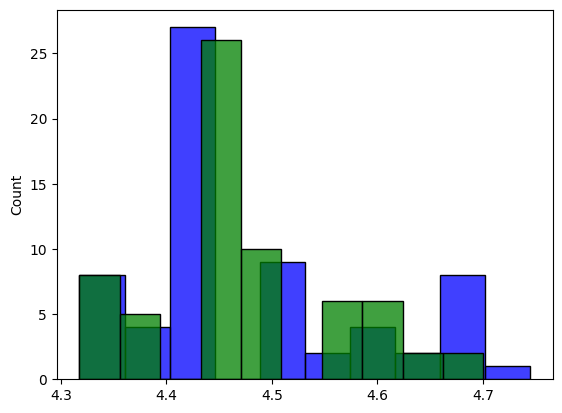

In [11]:
cdl, ccl, sdl, scl = np.log(chris_des), np.log(chris_curr), np.log(sus_des), np.log(sus_curr)
sns.histplot(cdl, color='blue', bins=10, label='Chris Deserved')
# sns.histplot(ccl, color='red', bins=10, label='Chris Current')
sns.histplot(sdl, color='green', bins=10, label='Susan Deserved')
# sns.histplot(scl, color='yellow', bins=10, label='Susan Current')

Text(0.5, 0, 'Deserved Salary ($1000$ USD)')

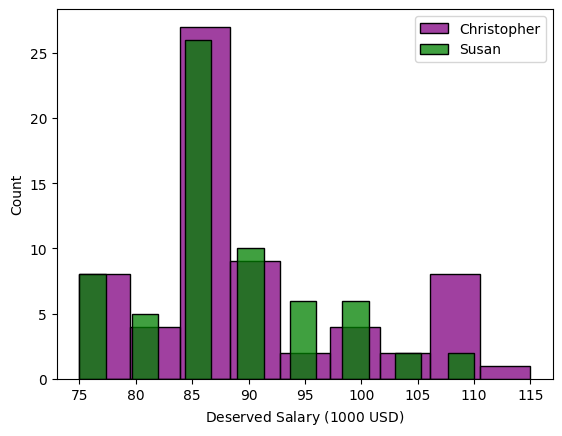

In [12]:
sns.histplot(chris_des, color='purple', label='Christopher')
sns.histplot(sus_des, color='green', label='Susan')
plt.legend()
plt.xlabel('Deserved Salary ($1000$ USD)')

Text(0.5, 0, 'Current Salary ($1000$ USD)')

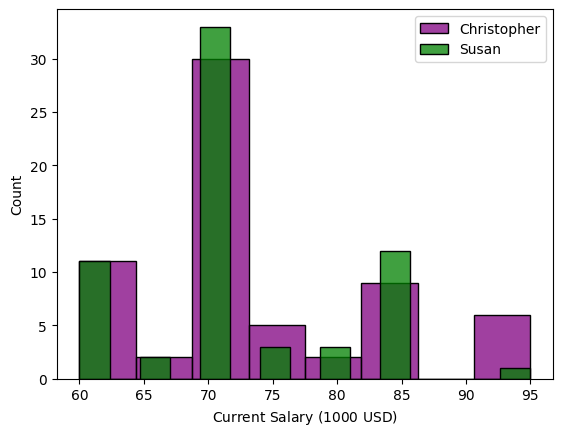

In [13]:
sns.histplot(chris_curr, color='purple', label='Christopher')
sns.histplot(sus_curr, color='green', label='Susan')
plt.legend()
plt.xlabel('Current Salary ($1000$ USD)')

In [14]:
des_res = ttest_ind(chris_des, sus_des, alternative='two-sided')
curr_res = ttest_ind(chris_curr, sus_curr, alternative='two-sided')
des_res.pvalue, curr_res.pvalue

(np.float64(0.3256004823219958), np.float64(0.4659484384883158))

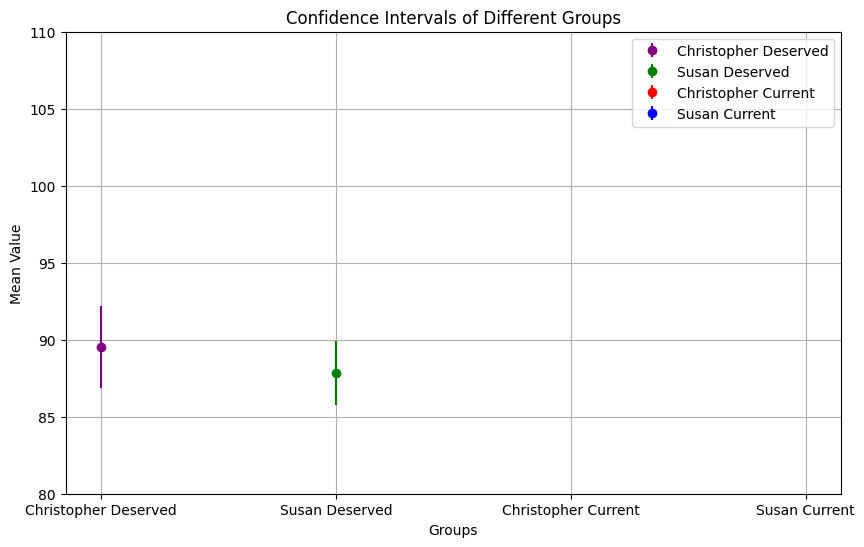

In [15]:
import scipy.stats as stats
# Calculate confidence intervals
conf_int1 = norm.interval(0.95, loc=np.mean(chris_des), scale=stats.sem(chris_des))
conf_int2 = norm.interval(0.95, loc=np.mean(sus_des), scale=stats.sem(sus_des))
conf_int3 = norm.interval(0.95, loc=np.mean(chris_curr), scale=stats.sem(chris_curr))
conf_int4 = norm.interval(0.95, loc=np.mean(sus_curr), scale=stats.sem(sus_curr))

# Plotting confidence intervals
plt.figure(figsize=(10, 6))

# Plot first set of confidence intervals
plt.errorbar(x=1, y=np.mean(chris_des), yerr=np.mean(chris_des)-conf_int1[0], fmt='o', label='Christopher Deserved',
             color='purple')
plt.errorbar(x=2, y=np.mean(sus_des), yerr=np.mean(sus_des)-conf_int2[0], fmt='o', label='Susan Deserved',
             color='green')

# Plot second set of confidence intervals
plt.errorbar(x=3, y=np.mean(chris_curr), yerr=np.mean(chris_curr)-conf_int3[0], fmt='o', label='Christopher Current',
             color='red')
plt.errorbar(x=4, y=np.mean(sus_curr), yerr=np.mean(sus_curr)-conf_int4[0], fmt='o', label='Susan Current',
             color='blue')

# Customizing the plot
plt.xticks([1, 2, 3, 4], ['Christopher Deserved', 'Susan Deserved', 'Christopher Current', 'Susan Current'])
plt.xlabel('Groups')
plt.ylabel('Mean Value')
plt.title('Confidence Intervals of Different Groups')
plt.legend()
plt.grid()
plt.ylim(80,110)

plt.show()

<Axes: ylabel='deserved_salary'>

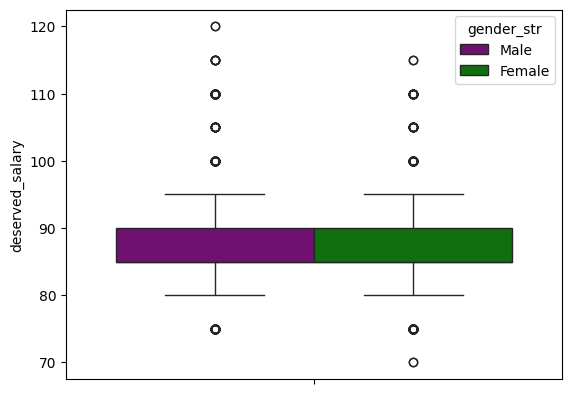

In [16]:
sns.boxplot(data=df,y='deserved_salary', hue='gender_str', palette=['purple', 'green'])

In [17]:
conf_int1, conf_int2

((np.float64(86.8917156405815), np.float64(92.18520743634157)),
 (np.float64(85.77431464211334), np.float64(89.91799305019434)))

In [18]:
conf_int3, conf_int4

((np.float64(70.74823095744138), np.float64(75.63638442717401)),
 (np.float64(69.94123029719705), np.float64(74.05876970280295)))

In [19]:
new_df = df.copy()
deserved_scaler = StandardScaler()
new_df['deserved_standardized'] = deserved_scaler.fit_transform(df['deserved_salary'].to_numpy().reshape(-1,1))
new_df['current_standardized'] = deserved_scaler.fit_transform(df['current_salary'].to_numpy().reshape(-1,1))
new_df.head()

,name,gender,current_salary,deserved_salary,round_,gender_str,deserved_standardized,current_standardized
0,James,Gender.Male,85.0,105.0,1,Male,1.825268,1.574676
0,James,Gender.Male,85.0,110.0,1,Male,2.376178,1.574676
0,James,Gender.Male,85.0,105.0,1,Male,1.825268,1.574676
0,James,Gender.Male,85.0,100.0,1,Male,1.274357,1.574676
0,James,Gender.Male,85.0,95.0,1,Male,0.723446,1.574676


<Axes: xlabel='deserved_standardized', ylabel='Count'>

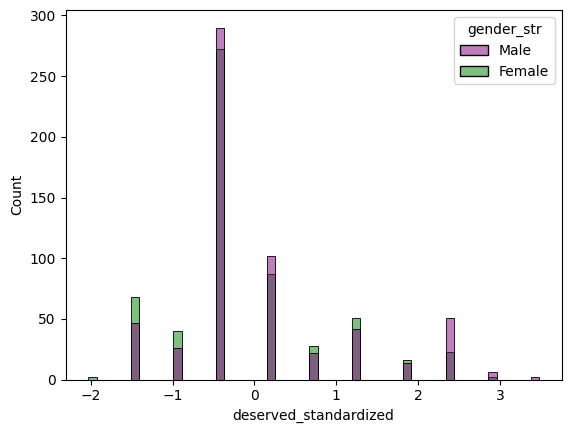

In [20]:
sns.histplot(new_df, x='deserved_standardized', hue='gender_str', palette=['purple','green'])

In [21]:
df = ds.get_db('GPT')
df

,name,gender,current_salary,deserved_salary,round_
0,James,Gender.Male,70.0,90.0,2
0,James,Gender.Male,70.0,85.0,2
0,James,Gender.Male,70.0,85.0,2
0,James,Gender.Male,70.0,85.0,2
0,James,Gender.Male,70.0,85.0,2
...,...,...,...,...,...
0,Sarah,Gender.Female,70.0,85.0,2
0,Sarah,Gender.Female,70.0,85.0,2
0,Sarah,Gender.Female,70.0,85.0,2
0,Sarah,Gender.Female,70.0,85.0,2


In [27]:
men_mask = df['gender'] == Gender.Male
df_male = df[men_mask]
df_female = df[~men_mask]

display(df_male.describe())
display(df_female.describe())

,current_salary,deserved_salary,round_
count,497.000000,497.000000,497.0
mean,69.557344,85.734406,2.0
std,4.612530,5.380097,0.0
min,60.000000,75.000000,2.0
25%,70.000000,85.000000,2.0
50%,70.000000,85.000000,2.0
75%,70.000000,90.000000,2.0
max,90.000000,110.000000,2.0


,current_salary,deserved_salary,round_
count,494.000000,494.000000,494.0
mean,68.755091,84.716599,2.0
std,5.751320,5.517871,0.0
min,0.015000,70.000000,2.0
25%,70.000000,85.000000,2.0
50%,70.000000,85.000000,2.0
75%,70.000000,85.000000,2.0
max,80.000000,100.000000,2.0


In [31]:
df_female['current_salary'].value_counts()

current_salary
70.000    321
60.000     81
75.000     36
65.000     31
80.000     24
0.015       1
Name: count, dtype: int64